In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate

The general form of its probability density function is:
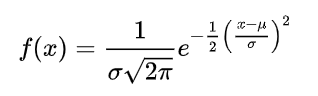

In [21]:
def normal_dist(x, mean=0.0, vari=1.0):
    """A normal distribution function
    """
    return (1.0/(np.sqrt(2.0*np.pi*vari)))*np.exp((-np.power((x-mean),2.0))/(2.0*vari))

In [22]:
def MSEintegrand(x, yVal):
    return  ((x- yVal)**2) * normal_dist(x)

In [23]:
def yUpdateNumerator(x):
    return  x * normal_dist(x)
def yUpdateDenominator  (x):
    return  normal_dist(x)

def yUpdate(lower, upper):
    return integrate.quad( yUpdateNumerator,lower, upper,)[0]\
                                     /integrate.quad( yUpdateDenominator,lower, upper,)[0]

In [24]:
def UniformQuantizer(x):
    return [{"from": x[i], "to": x[i+1], "value":( x[i]+ x[i+1])/2, } for i in range(len(x)-1)]

In [54]:
def LyoidMax(x, yquant):
    y =  [e['value'] for e in yquant]
    threshold = 0.00001
    print(".", end ="") #progress for each 
    b, sigma=  [ x[e] for e in range(len(x))] , 10000

    c=0
    while True and c < 100:
        c+=1
        for i in  range(1, len(y)):
            b[i]= (y[i-1]+ y[i])/2 
        sigma = sum([integrate.quad(MSEintegrand, b[i], b[i+1], y[i])[0] for i in range(len(x)-1)])
        if sigma < threshold: print('break'); break
        y=[yUpdate(b[i], b[i+1]) for i in range(len(x)-1)]
    toReturn=[]
    for i, e in enumerate(y):
        toReturn.append({"value":e , "from":b[i] , "to":b[i+1]})
    return toReturn, b, [normal_dist(e) for e in b]

## (a) Assume the variance to be one and plot the PDF of a zero-mean Gaussian random variable.

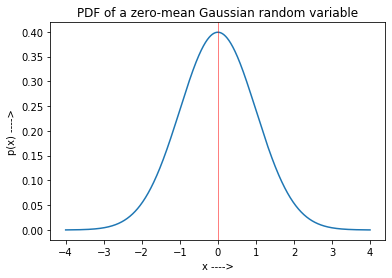

In [55]:
def PlotGaussian():
    plt.plot(np.linspace(-4, 4, 1000 ),  [normal_dist(i) for i in np.linspace(-4, 4, 1000 )],  label='gaussian curve')
    plt.xlabel('x ---->') ; plt.ylabel('p(x) ---->')
    plt.title('PDF of a zero-mean Gaussian random variable')
    plt.axvline(x=0, color="red", linewidth=0.5) #mean
PlotGaussian()

## (b-1) Apply a Uniform Quantizer to the PDF in (a). Make a new figure showing the decision boundaries and reconstruction levels superimposed on the PDF of (a).

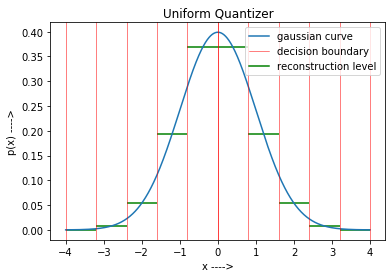

In [62]:
def Quantizer(LyoidMaxAlgorithm=False, label=None,):
    Data =[]
    for m in range(1, 32, 3):
        M=m #Number of quantization levels
        Xmin, Xmax = -4, 4
        x= np.linspace(Xmin,Xmax, M+1 ) #evenly spaced M samples over a specified interval.
        y = [normal_dist(i) for i in np.linspace(Xmin,Xmax, M+1 )] #  #quant levels
        yqant = UniformQuantizer(x) #quantized data
        if LyoidMaxAlgorithm: yqant,x, y = LyoidMax(x, yqant)
        QuantError = sum([integrate.quad(MSEintegrand, v['from'], v['to'],v['value'] )[0] for v in yqant])
        Data.append({"error" :QuantError, "M": M, "LyoidMaxAlgorithm": yqant})

        if M==10:
            PlotGaussian()
            for i in x: plt.axvline(x=i, color="red", linewidth=0.5,) # horizontal lines representing levels
            plt.plot(0, 0,color="red",linewidth=0.5, label='decision boundary') #just for legend
            
#             plt.plot(x, y) # reconstructed graph
            
            for i in yqant: plt.hlines(y = normal_dist(i['value']), xmin = i['from'], xmax = i['to'], color="green")   #quant level
            plt.plot(0, 0,color="green", label='reconstruction level') #just for legend
            
            plt.xlabel('x ---->') ; plt.ylabel('p(x) ---->')
            plt.title(label)
            plt.legend() ; plt.show()
    return Data

uniformQuantizerData = Quantizer(LyoidMaxAlgorithm=False, label="Uniform Quantizer")

## (b-1) Vary the number of decision boundaries and plot the quantization error versus the number of quantization levels

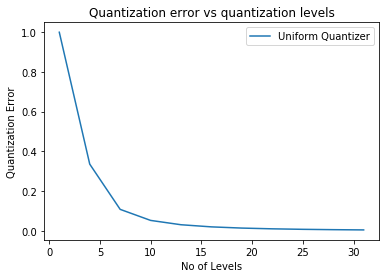

In [63]:
def PlotData(data, label):
    plt.plot([e['M'] for e in data], [e['error'] for e in data],label=label )
    plt.xlabel('No of Levels')
    plt.ylabel('Quantization Error')
    plt.title('Quantization error vs quantization levels')
    plt.legend() ; plt.show()
PlotData(uniformQuantizerData, label="Uniform Quantizer")

## (c-1) Implement  the Llyod-Max  Algorithmto the  PDF  of  (a).  Make  a  new  figure  showing  the  decision  boundaries  and reconstruction levels superimposed on the PDF of (a).

....

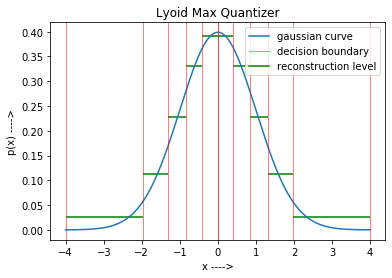

.......

In [64]:
nonUniformQData = Quantizer(LyoidMaxAlgorithm=True, label="Lyoid Max Quantizer")

## (c-2) Vary the number of decision boundaries and plot the quantization error versus the number of quantization levels.

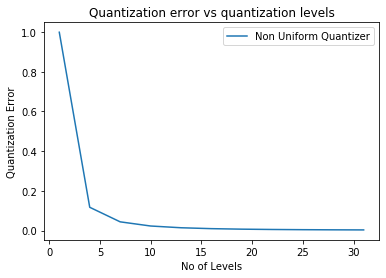

In [65]:
PlotData(nonUniformQData, label="Non Uniform Quantizer")

## (d) For both (a) and (b) choose the same number of quantization levels and compare the performance between (a) and (b) in terms of quantization errors.

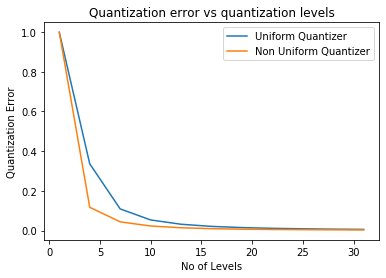

In [66]:
plt.plot([e['M'] for e in uniformQuantizerData],[e['error'] for e in uniformQuantizerData],label="Uniform Quantizer" )
plt.plot([e['M'] for e in nonUniformQData],[e['error'] for e in nonUniformQData],label="Non Uniform Quantizer" )
plt.xlabel('No of Levels')
plt.ylabel('Quantization Error')
plt.title('Quantization error vs quantization levels')
plt.legend() ; plt.show()